In [1]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVR
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
train = pd.read_csv(r'C:\Users\Josue\Data Science Projects\playground-series-s3e17\train.csv')
test = pd.read_csv(r'C:\Users\Josue\Data Science Projects\playground-series-s3e17\test.csv')
original = pd.read_csv(r'C:\Users\Josue\Data Science Projects\playground-series-s3e17\machine failure.csv')

train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [3]:
original

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
def drop_missing_rows(df):
    if df.isnull().any().any():
        print('Missing values found in the dataframe!')
        df = df.dropna(axis=0)
        dropped_rows = len(df) - len(df.dropna())
        print('Dropped', dropped_rows, 'rows.')

    else:
        print('No missing values found in the dataframe.')

    return df

train = drop_missing_rows(train)
test = drop_missing_rows(test)
original = drop_missing_rows(original)

No missing values found in the dataframe.
No missing values found in the dataframe.
No missing values found in the dataframe.


In [7]:
def drop_duplicate_rows(df):
    dupe = df[df.duplicated()]

    if not dupe.empty:
        print('Duplicate rows found in the dataframe!')
        count = len(dupe)
        print(count, 'duplicated rows found.')
        df = df.drop_duplicates()
        print('Dropped the rows.')

    else:
        print('No duplicate rows found.')

    return df

train = drop_duplicate_rows(train)
test = drop_duplicate_rows(test)
original = drop_duplicate_rows(original)

No duplicate rows found.
No duplicate rows found.
No duplicate rows found.


Text(-1, 5, 'Scatter Matrix with Target')

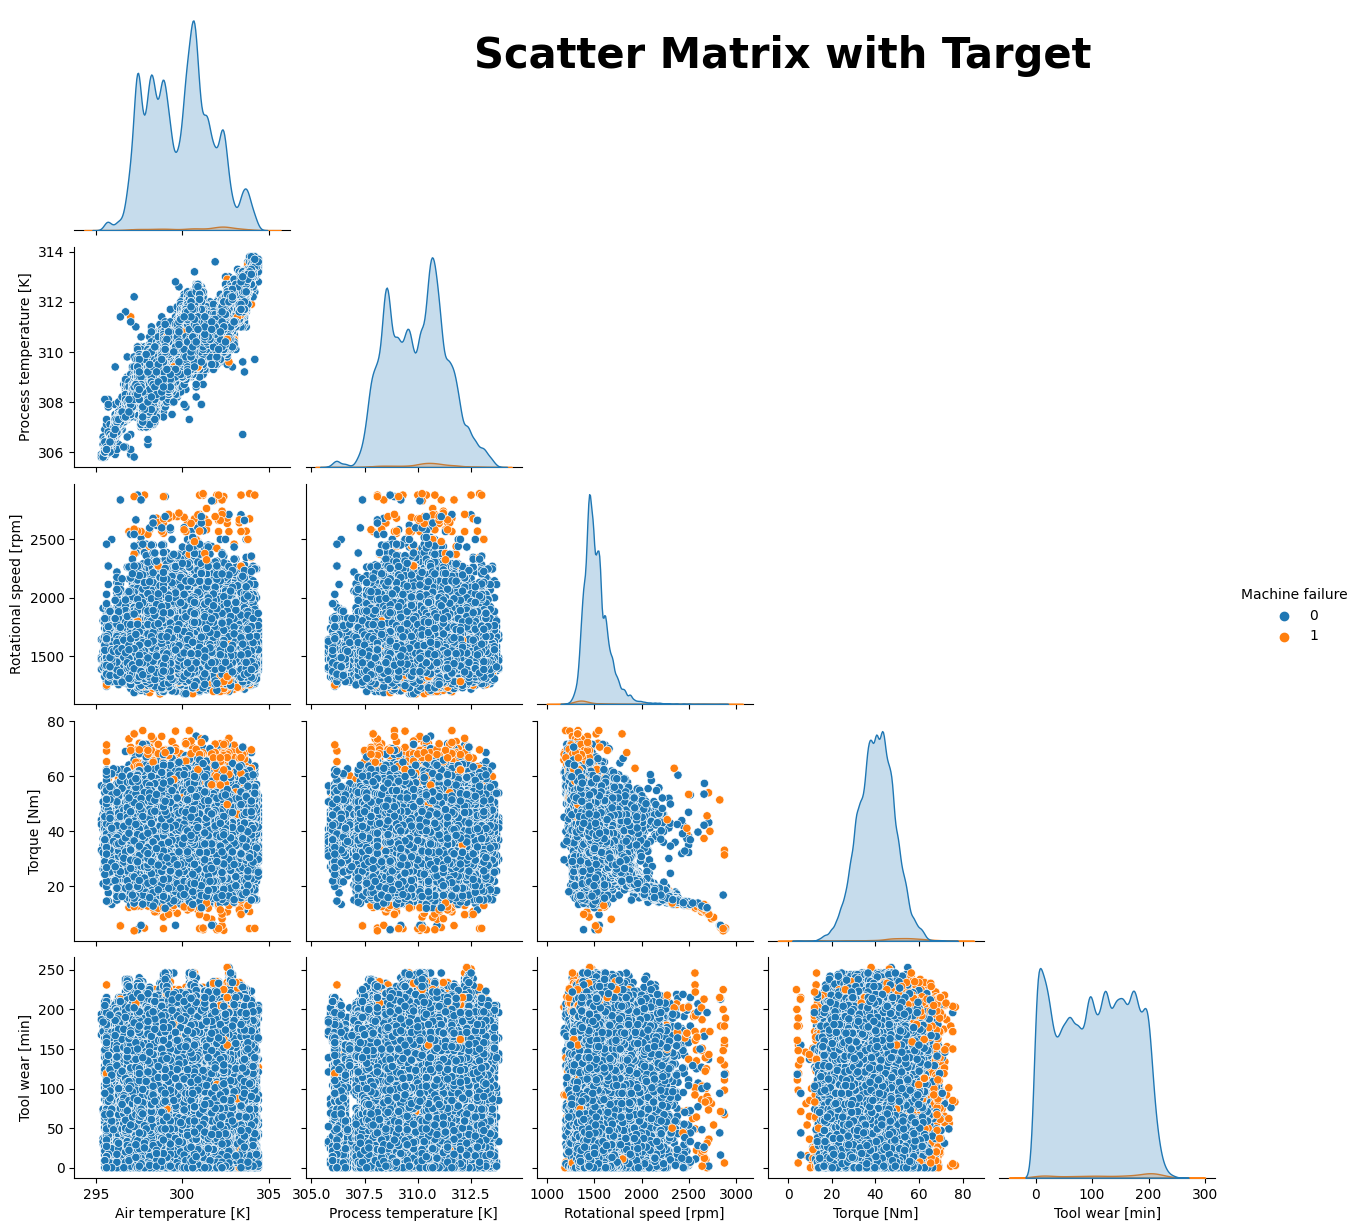

In [8]:
sns.pairplot(data=train, x_vars=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], 
             y_vars=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
             hue='Machine failure', corner=True)

plt.title('Scatter Matrix with Target', fontweight='bold', fontsize=30, x=-1 , y=5)

<Axes: >

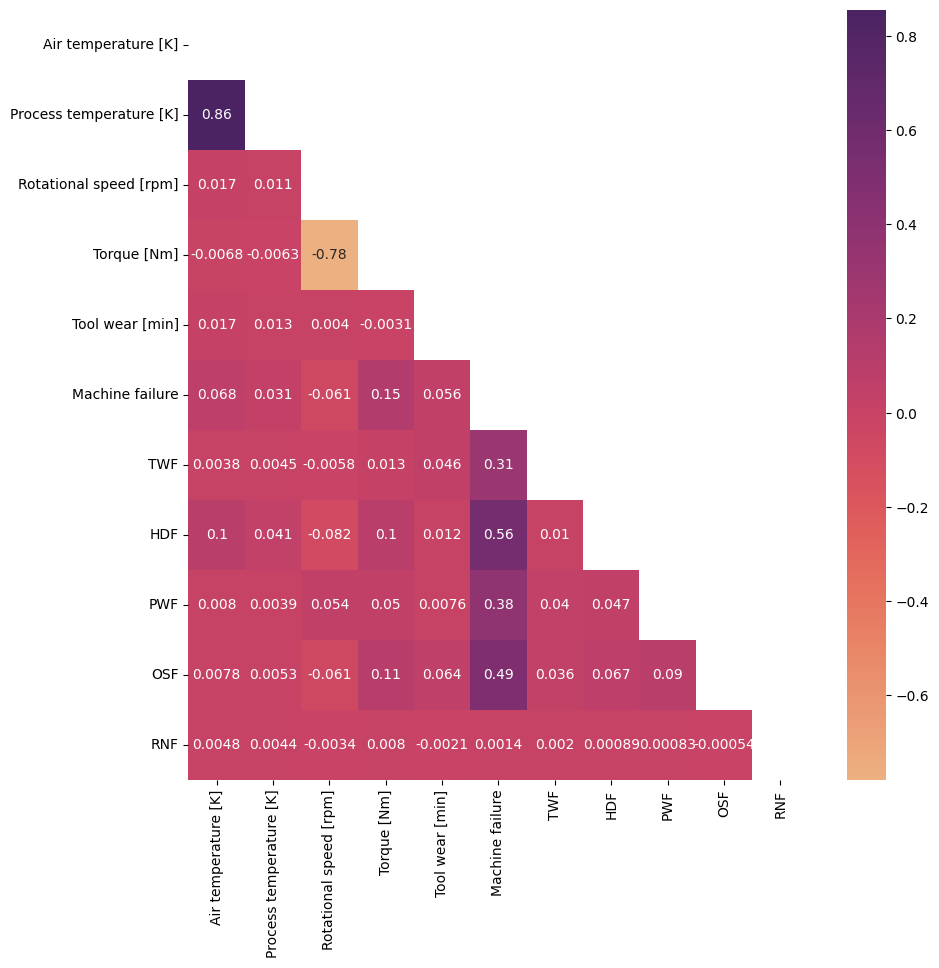

In [9]:
correlation = train.drop(columns=['id', 'Product ID', 'Type'], axis=1).corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))

fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(correlation, annot=True, mask=mask, cmap='flare')

In [10]:
X = train.drop(['id', 'Machine failure', 'Product ID', 'Type'], axis=1)
y = train['Machine failure']

In [11]:
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

gb_scores = list()
hist_scores = list()
lgbm_scores = list()
xgb_scores = list()
cb_scores = list()

skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)

for i, (train_ix, test_ix) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

    print('++++++++++++++++++++++++++++++++++++++++++++++++++++')

    gb = GradientBoostingClassifier(loss='log_loss').fit(X_train, y_train)

    gb_pred1 = gb.predict(X_test)

    gb_score_fold = roc_auc_score(y_test, gb_pred1)
    gb_scores.append(gb_score_fold)

    print('Fold', i, 'Gradient Boosting MAE is', gb_score_fold)

    #HISTGRADIENTBOOSTINGREGRESSOR

    hist = HistGradientBoostingClassifier(loss='log_loss').fit(X_train, y_train)

    hist_pred1 = hist.predict(X_test)

    hist_score_fold = roc_auc_score(y_test, hist_pred1)
    hist_scores.append(hist_score_fold)

    print('Fold', i, 'Histogram Gradient Boosting MAE is', hist_score_fold)

    #LIGHTGBM

    lgbm = LGBMClassifier(objective='binary').fit(X_train, y_train)

    lgbm_pred1 = lgbm.predict(X_test)

    lgbm_score_fold = roc_auc_score(y_test, lgbm_pred1)
    lgbm_scores.append(lgbm_score_fold)

    print('Fold', i, 'LGBMRegressor MAE is', lgbm_score_fold)

    #XGBOOSt

    xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc', learning_rate=.01, colsample_bytree=0.8266224340341357, gamma=7.768769241777578, max_depth=5, min_child_weight=6, 
                     reg_alpha=43.0, reg_lambda=0.9628350921302673, n_estimators=1000).fit(X_train, y_train)

    xgb_pred1 = xgb.predict(X_test)

    xgb_score_fold = roc_auc_score(y_test, xgb_pred1)
    xgb_scores.append(xgb_score_fold)

    print('Fold', i, 'XGBRegressor MAE is', xgb_score_fold)


++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 0 Gradient Boosting MAE is 0.8856878001793665
Fold 0 Histogram Gradient Boosting MAE is 0.8834126492092758
Fold 0 LGBMRegressor MAE is 0.8833009464874528
Fold 0 XGBRegressor MAE is 0.8741072570055703
++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 1 Gradient Boosting MAE is 0.8847161606085167
Fold 1 Histogram Gradient Boosting MAE is 0.8835347520973184
Fold 1 LGBMRegressor MAE is 0.8835906055378904
Fold 1 XGBRegressor MAE is 0.8755255419082653
++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 2 Gradient Boosting MAE is 0.8719999341881941
Fold 2 Histogram Gradient Boosting MAE is 0.87207440544229
Fold 2 LGBMRegressor MAE is 0.8719813163746701
Fold 2 XGBRegressor MAE is 0.8662604519539179
++++++++++++++++++++++++++++++++++++++++++++++++++++
Fold 3 Gradient Boosting MAE is 0.8952185125146345
Fold 3 Histogram Gradient Boosting MAE is 0.8916929047945633
Fold 3 LGBMRegressor MAE is 0.8950695700064426
Fold 3 XGBRegres

[Text(0, 0, '0.8835'),
 Text(0, 0, '0.882126'),
 Text(0, 0, '0.882761'),
 Text(0, 0, '0.875189')]

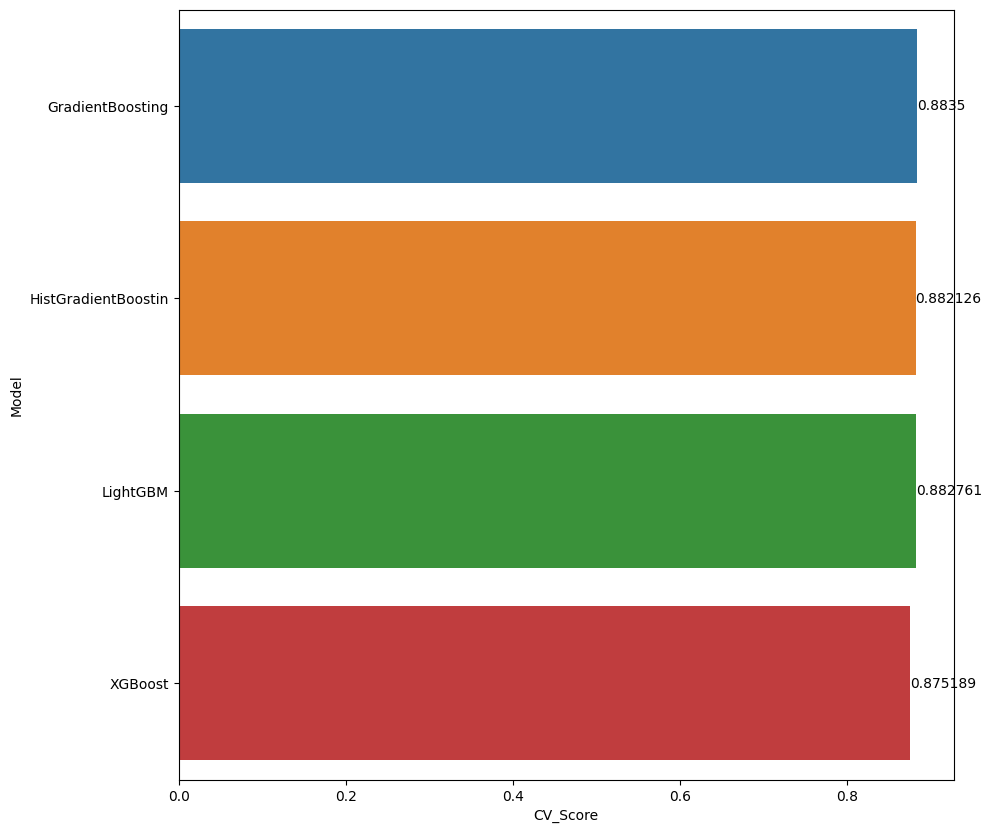

In [12]:
gb_cv_score = np.mean(gb_scores)
hist_cv_score = np.mean(hist_scores)
lgbm_cv_score = np.mean(lgbm_scores)
xgb_cv_score = np.mean(xgb_scores)

performance = pd.DataFrame({'Model': ['GradientBoosting', 'HistGradientBoostin', 'LightGBM', 'XGBoost'], 'CV_Score': [gb_cv_score, hist_cv_score, lgbm_cv_score, xgb_cv_score]})

fig, ax = plt.subplots(1, figsize=(10,10))
ax = sns.barplot(data=performance, x='CV_Score', y='Model')
ax.bar_label(ax.containers[0])

In [13]:
importance = xgb.feature_importances_
sorted_id = np.argsort(importance)[::-1]
features = X.columns

Text(0.5, 1.0, 'Feature Importance')

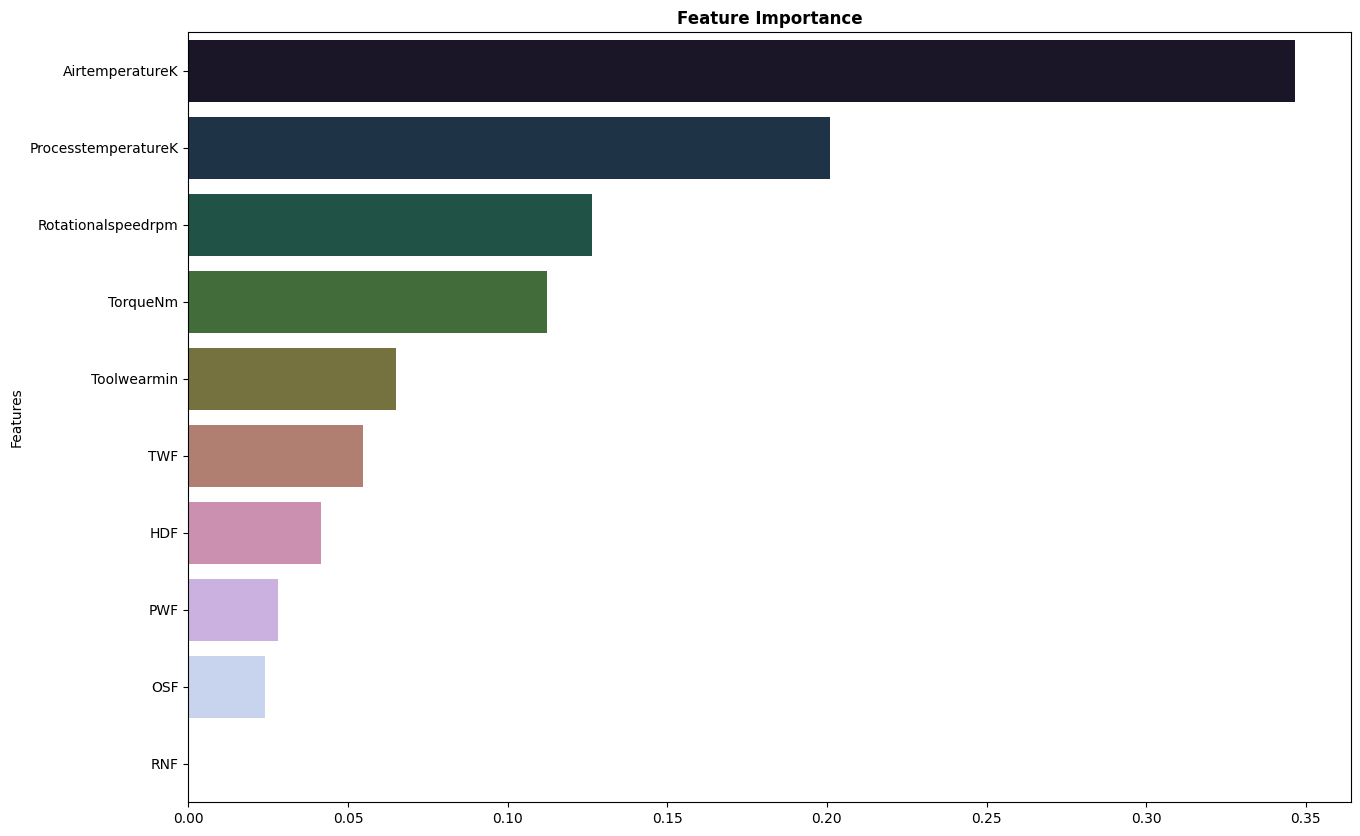

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(x=importance[sorted_id], y=np.array(features), palette='cubehelix')
plt.ylabel('Features')
plt.title('Feature Importance', fontsize=12, fontweight='bold')

In [15]:
sub = pd.DataFrame()
sub['id'] = test.id
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.drop(['id'], axis=1)

In [16]:
test = test.drop(['ProductID', 'Type'], axis=1)
xgbc = XGBClassifier()
xgbc.fit(X,y)

predictions = xgbc.predict(test)

sub['Machine Failure'] = predictions
sub.to_csv('PS_S3E17.csv', index=False)

sub

,id,Machine Failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [17]:
test

,AirtemperatureK,ProcesstemperatureK,Rotationalspeedrpm,TorqueNm,Toolwearmin,TWF,HDF,PWF,OSF,RNF
0,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
90949,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [2, 4, 6],
    'learning_rate': [.1, .05, .001],
    'verbosity': [0],
    'eval_metric': ['auc']
}

xgb_tune = GridSearchCV(xgb, param_grid=param_grid, scoring='roc_auc', cv=skf, return_train_score=True, verbose=1)
xgb_tune.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8266224340341357,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=7.768769241777578, gpu_id=None,
                                     gro...
                                     max_leaves=None, min_child_weight=6,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eval_metric': ['auc'],
                         'learning_rate': [0.1, 0.05, 0.001],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [100, 500, 1000], 'verbosity': [0]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
print('XGB Parameters: ', xgb_tune.best_params_)
print('Mean After: {:.2f}'.format(xgb_tune.cv_results_['mean_train_score'][xgb_tune.best_index_]))

XGB Parameters:  {'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'verbosity': 0}
Mean After: 0.96


In [20]:
xgbc = XGBClassifier(eval_metric='auc', learning_rate=.1, max_depth=2, n_estimators=500)
xgbc.fit(X,y)

predictions = xgbc.predict(test)

sub['Machine Failure'] = predictions
sub.to_csv('PS_S3E17.csv', index=False)

sub

,id,Machine Failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [21]:
import optuna
def objective(trial):
    
    n_leaves = trial.suggest_int('num_leaves', 31,100)
    max_depth = trial.suggest_int("max_depth", -1,10)
    n_estimators = trial.suggest_int("n_estimators", 10,2000)
    r_alpha = trial.suggest_int("reg_alpha", 0.0, 0.1)
    r_lambda = trial.suggest_int("reg_lambda", 0.0, 0.1)
    l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    subsample =  trial.suggest_uniform('subsample', 0.5, 1.0)
    lambda_l1 = trial.suggest_int("lambda_l1", 0.0, 4)
    lambda_l2 = trial.suggest_int("lambda_l2", 0.0, 4)
    feature_fraction =  trial.suggest_uniform('feature_fraction', 0.5, 1.0)

    lgb = LGBMClassifier(
            num_leaves =n_leaves,
            max_depth=max_depth, 
            n_estimators=n_estimators,
            reg_alpha = r_alpha,
            reg_lambda = r_lambda,
            learning_rate = l_rate,
            subsample = subsample,
            lambda_l1 = lambda_l1,
            lambda_l2 = lambda_l2,
            feature_fraction = feature_fraction
        )
    
    lgb.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=20, verbose=False)

    y_pred_proba = lgb.predict_proba(X_train)[:, 1]
    roc_auc = roc_auc_score(y_train, y_pred_proba)

    return roc_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2023-08-17 18:05:36,593] A new study created in memory with name: no-name-fb04d59c-83aa-42ce-a562-b8d1e75cd4c0
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform('subsample', 0.5, 1.0)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

[LightGBM] [Warning] feature_fraction is set=0.9260465249268293, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9260465249268293
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0 will be ignored. Current value: lambda_l2=2


[I 2023-08-17 18:05:40,224] Trial 0 finished with value: 0.9928456654215646 and parameters: {'num_leaves': 62, 'max_depth': 0, 'n_estimators': 972, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.005059268010551085, 'subsample': 0.5419517288672776, 'lambda_l1': 0, 'lambda_l2': 2, 'feature_fraction': 0.9260465249268293}. Best is trial 0 with value: 0.9928456654215646.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[LightGBM] [Warning] feature_fraction is set=0.6652898515730239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6652898515730239
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0 will be ignored. Current value: lambda_l2=2


[I 2023-08-17 18:05:41,728] Trial 1 finished with value: 0.9681054615129162 and parameters: {'num_leaves': 100, 'max_depth': 4, 'n_estimators': 886, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.007372615429942757, 'subsample': 0.6966955590380495, 'lambda_l1': 4, 'lambda_l2': 2, 'feature_fraction': 0.6652898515730239}. Best is trial 0 with value: 0.9928456654215646.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifor

[LightGBM] [Warning] feature_fraction is set=0.9771826781541972, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9771826781541972
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:05:45,531] Trial 2 finished with value: 0.9998225177867374 and parameters: {'num_leaves': 84, 'max_depth': 0, 'n_estimators': 1042, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.04880467979077713, 'subsample': 0.6116461865617902, 'lambda_l1': 2, 'lambda_l2': 3, 'feature_fraction': 0.9771826781541972}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[LightGBM] [Warning] feature_fraction is set=0.5689788777086773, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5689788777086773
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0 will be ignored. Current value: lambda_l2=0


[I 2023-08-17 18:05:46,902] Trial 3 finished with value: 0.9860291424554084 and parameters: {'num_leaves': 38, 'max_depth': 3, 'n_estimators': 817, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.05061957165033319, 'subsample': 0.6159422897075966, 'lambda_l1': 1, 'lambda_l2': 0, 'feature_fraction': 0.5689788777086773}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform(

[LightGBM] [Warning] feature_fraction is set=0.8820773626162886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8820773626162886
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:05:48,038] Trial 4 finished with value: 0.9662162421582058 and parameters: {'num_leaves': 60, 'max_depth': 4, 'n_estimators': 683, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.006182824367212001, 'subsample': 0.9327292013307024, 'lambda_l1': 2, 'lambda_l2': 3, 'feature_fraction': 0.8820773626162886}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[LightGBM] [Warning] feature_fraction is set=0.6739587550822561, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6739587550822561
[LightGBM] [Warning] lambda_l1 is set=2, reg_alpha=0 will be ignored. Current value: lambda_l1=2
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0 will be ignored. Current value: lambda_l2=4


[I 2023-08-17 18:05:48,994] Trial 5 finished with value: 0.9705364661114138 and parameters: {'num_leaves': 63, 'max_depth': 7, 'n_estimators': 396, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0100369121101205, 'subsample': 0.702705914089135, 'lambda_l1': 2, 'lambda_l2': 4, 'feature_fraction': 0.6739587550822561}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform('s

[LightGBM] [Warning] feature_fraction is set=0.6901116641797758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6901116641797758
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0 will be ignored. Current value: lambda_l2=4


[I 2023-08-17 18:05:50,196] Trial 6 finished with value: 0.9790874946507453 and parameters: {'num_leaves': 52, 'max_depth': 3, 'n_estimators': 758, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.04202347795365509, 'subsample': 0.5857503541317243, 'lambda_l1': 0, 'lambda_l2': 4, 'feature_fraction': 0.6901116641797758}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform(

[LightGBM] [Warning] feature_fraction is set=0.6688948688289426, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6688948688289426
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0 will be ignored. Current value: lambda_l2=0


[I 2023-08-17 18:05:51,389] Trial 7 finished with value: 0.9685745280302301 and parameters: {'num_leaves': 68, 'max_depth': 10, 'n_estimators': 367, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.002213825786991519, 'subsample': 0.8418827673596956, 'lambda_l1': 3, 'lambda_l2': 0, 'feature_fraction': 0.6688948688289426}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifor

[LightGBM] [Warning] feature_fraction is set=0.987192162125362, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.987192162125362
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0 will be ignored. Current value: lambda_l2=2


[I 2023-08-17 18:05:54,882] Trial 8 finished with value: 0.9737856829642771 and parameters: {'num_leaves': 96, 'max_depth': 7, 'n_estimators': 1634, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.003307677507277812, 'subsample': 0.8323015733515982, 'lambda_l1': 4, 'lambda_l2': 2, 'feature_fraction': 0.987192162125362}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[LightGBM] [Warning] feature_fraction is set=0.8878915819379393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8878915819379393
[LightGBM] [Warning] lambda_l1 is set=4, reg_alpha=0 will be ignored. Current value: lambda_l1=4
[LightGBM] [Warning] lambda_l2 is set=2, reg_lambda=0 will be ignored. Current value: lambda_l2=2


[I 2023-08-17 18:05:55,115] Trial 9 finished with value: 0.946036585720817 and parameters: {'num_leaves': 98, 'max_depth': 1, 'n_estimators': 166, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.016263182917650876, 'subsample': 0.8771032147121329, 'lambda_l1': 4, 'lambda_l2': 2, 'feature_fraction': 0.8878915819379393}. Best is trial 2 with value: 0.9998225177867374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform(

[LightGBM] [Warning] feature_fraction is set=0.8176101531143624, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8176101531143624
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:05:58,907] Trial 10 finished with value: 0.9999836215669495 and parameters: {'num_leaves': 81, 'max_depth': -1, 'n_estimators': 1472, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.08602177519128634, 'subsample': 0.5192224714673456, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.8176101531143624}. Best is trial 10 with value: 0.9999836215669495.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[LightGBM] [Warning] feature_fraction is set=0.8160815663228553, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8160815663228553
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:06:02,556] Trial 11 finished with value: 0.9999839627278959 and parameters: {'num_leaves': 82, 'max_depth': -1, 'n_estimators': 1425, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.09731104262238693, 'subsample': 0.503423974311044, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.8160815663228553}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[LightGBM] [Warning] feature_fraction is set=0.796104989255871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.796104989255871
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:06:06,559] Trial 12 finished with value: 0.9999827930332227 and parameters: {'num_leaves': 81, 'max_depth': -1, 'n_estimators': 1615, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.08283407818190233, 'subsample': 0.5003601583319237, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.796104989255871}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[LightGBM] [Warning] feature_fraction is set=0.8099267868266512, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8099267868266512
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0 will be ignored. Current value: lambda_l2=1


[I 2023-08-17 18:06:08,943] Trial 13 finished with value: 0.9701460778066276 and parameters: {'num_leaves': 80, 'max_depth': 1, 'n_estimators': 1971, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.09513323374414624, 'subsample': 0.5180896693395394, 'lambda_l1': 1, 'lambda_l2': 1, 'feature_fraction': 0.8099267868266512}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[LightGBM] [Warning] feature_fraction is set=0.8016625004546911, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8016625004546911
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:06:13,645] Trial 14 finished with value: 0.9738201781266282 and parameters: {'num_leaves': 76, 'max_depth': -1, 'n_estimators': 1317, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0011416183369977238, 'subsample': 0.5859574179512673, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.8016625004546911}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_un

[LightGBM] [Warning] feature_fraction is set=0.7619997682800609, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7619997682800609
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0 will be ignored. Current value: lambda_l2=4


[I 2023-08-17 18:06:15,263] Trial 15 finished with value: 0.964284591587702 and parameters: {'num_leaves': 90, 'max_depth': 1, 'n_estimators': 1321, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.025122643342574937, 'subsample': 0.5055104230998202, 'lambda_l1': 0, 'lambda_l2': 4, 'feature_fraction': 0.7619997682800609}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[LightGBM] [Warning] feature_fraction is set=0.8661984928629072, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8661984928629072
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0 will be ignored. Current value: lambda_l2=1


[I 2023-08-17 18:06:18,583] Trial 16 finished with value: 0.9950910378508595 and parameters: {'num_leaves': 72, 'max_depth': 6, 'n_estimators': 1366, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.027963898260558926, 'subsample': 0.6552655329902476, 'lambda_l1': 3, 'lambda_l2': 1, 'feature_fraction': 0.8661984928629072}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[LightGBM] [Warning] feature_fraction is set=0.7307062626710276, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7307062626710276
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=3, reg_lambda=0 will be ignored. Current value: lambda_l2=3


[I 2023-08-17 18:06:21,412] Trial 17 finished with value: 0.9847832605861768 and parameters: {'num_leaves': 89, 'max_depth': 2, 'n_estimators': 1911, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.09393967066990687, 'subsample': 0.7636516971269194, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.7307062626710276}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[LightGBM] [Warning] feature_fraction is set=0.836515588951189, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.836515588951189
[LightGBM] [Warning] lambda_l1 is set=3, reg_alpha=0 will be ignored. Current value: lambda_l1=3
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0 will be ignored. Current value: lambda_l2=1


[I 2023-08-17 18:06:27,124] Trial 18 finished with value: 0.9975360625396752 and parameters: {'num_leaves': 49, 'max_depth': -1, 'n_estimators': 1656, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.016027625348240614, 'subsample': 0.5588276447899563, 'lambda_l1': 3, 'lambda_l2': 1, 'feature_fraction': 0.836515588951189}. Best is trial 11 with value: 0.9999839627278959.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\833032296.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[LightGBM] [Warning] feature_fraction is set=0.9273540958756137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273540958756137
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0 will be ignored. Current value: lambda_l2=4


[I 2023-08-17 18:06:30,946] Trial 19 finished with value: 0.9999950369205188 and parameters: {'num_leaves': 89, 'max_depth': 10, 'n_estimators': 1122, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.06502268956592076, 'subsample': 0.5539484760145377, 'lambda_l1': 0, 'lambda_l2': 4, 'feature_fraction': 0.9273540958756137}. Best is trial 19 with value: 0.9999950369205188.


In [22]:
trial = study.best_trial
print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Auc: 0.9999950369205188
Best hyperparameters: {'num_leaves': 89, 'max_depth': 10, 'n_estimators': 1122, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.06502268956592076, 'subsample': 0.5539484760145377, 'lambda_l1': 0, 'lambda_l2': 4, 'feature_fraction': 0.9273540958756137}


In [23]:
lgb_clf = LGBMClassifier(**trial.params)

lgb_clf.fit(X,y)

# Predicting the probabilities of the classes using the model
pred = lgb_clf.predict_proba(test)
pred[:,1]

[LightGBM] [Warning] feature_fraction is set=0.9273540958756137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9273540958756137
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=4, reg_lambda=0 will be ignored. Current value: lambda_l2=4


array([6.73733407e-04, 1.33773229e-03, 1.14402552e-05, ...,
       2.34888182e-05, 2.33397232e-05, 2.67777629e-04])

In [24]:
df = pd.DataFrame(pred[:,1])
df.columns = ['Machine failure']
# Creating the Data for the submission to competition
sub['Machine failure']=df['Machine failure'].copy()
sub.to_csv('PS_S3E17.csv', index=False)
sub

,id,Machine Failure,Machine failure
0,136429,0,0.000674
1,136430,0,0.001338
2,136431,0,0.000011
3,136432,0,0.000065
4,136433,0,0.000521
...,...,...,...
90949,227378,0,0.000014
90950,227379,0,0.000221
90951,227380,0,0.000023
90952,227381,0,0.000023


In [25]:
def objective(trial):
    
    n_leaves = trial.suggest_int('num_leaves', 31,100)
    max_depth = trial.suggest_int("max_depth", 1,10)
    n_estimators = trial.suggest_int("n_estimators", 10,2000)
    r_alpha = trial.suggest_int("reg_alpha", 0.0, 0.1)
    r_lambda = trial.suggest_int("reg_lambda", 0.0, 0.1)
    l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    subsample =  trial.suggest_uniform('subsample', 0.5, 1.0)
    lambda_l1 = trial.suggest_int("lambda_l1", 0.0, 4)
    lambda_l2 = trial.suggest_int("lambda_l2", 0.0, 4)
    feature_fraction =  trial.suggest_uniform('feature_fraction', 0.5, 1.0)

    xgb = XGBClassifier(
            num_leaves =n_leaves,
            max_depth=max_depth, 
            n_estimators=n_estimators,
            reg_alpha = r_alpha,
            reg_lambda = r_lambda,
            learning_rate = l_rate,
            subsample = subsample,
            lambda_l1 = lambda_l1,
            lambda_l2 = lambda_l2,
            feature_fraction = feature_fraction
        )
    
    xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)], early_stopping_rounds=20, verbose=False)

    y_pred_proba = xgb.predict_proba(X_train)[:, 1]
    roc_auc = roc_auc_score(y_train, y_pred_proba)

    return roc_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2023-08-17 18:06:35,052] A new study created in memory with name: no-name-dadb280c-355c-4549-8323-edabe4761cd8
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform('subsample', 0.5, 1.0)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[18:06:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:07:04,539] Trial 0 finished with value: 0.9999987138773848 and parameters: {'num_leaves': 39, 'max_depth': 9, 'n_estimators': 1569, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.03902924541117237, 'subsample': 0.9557363327268205, 'lambda_l1': 4, 'lambda_l2': 1, 'feature_fraction': 0.6568804255319399}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifor

[18:07:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:07:10,799] Trial 1 finished with value: 0.937857398244348 and parameters: {'num_leaves': 40, 'max_depth': 5, 'n_estimators': 470, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.002791380440390099, 'subsample': 0.5400222060694326, 'lambda_l1': 1, 'lambda_l2': 4, 'feature_fraction': 0.5386164758318576}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[18:07:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:07:39,726] Trial 2 finished with value: 0.9999971163777155 and parameters: {'num_leaves': 84, 'max_depth': 7, 'n_estimators': 1836, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.04133059436269826, 'subsample': 0.9314754538098736, 'lambda_l1': 4, 'lambda_l2': 4, 'feature_fraction': 0.7516569645714305}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifor

[18:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:08:12,891] Trial 3 finished with value: 0.9999911433535281 and parameters: {'num_leaves': 77, 'max_depth': 8, 'n_estimators': 1880, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.021471711554178617, 'subsample': 0.9198886403845077, 'lambda_l1': 1, 'lambda_l2': 1, 'feature_fraction': 0.8607927869367917}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[18:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:08:20,987] Trial 4 finished with value: 0.9751125309904782 and parameters: {'num_leaves': 56, 'max_depth': 2, 'n_estimators': 1066, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.029221154406688227, 'subsample': 0.9042477027752824, 'lambda_l1': 3, 'lambda_l2': 1, 'feature_fraction': 0.7785563935686378}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[18:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:08:44,904] Trial 5 finished with value: 0.9989562722372293 and parameters: {'num_leaves': 73, 'max_depth': 7, 'n_estimators': 1438, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.012065777679980634, 'subsample': 0.7972923719957605, 'lambda_l1': 4, 'lambda_l2': 1, 'feature_fraction': 0.8119807555490823}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[18:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:08:52,637] Trial 6 finished with value: 0.9494775783475436 and parameters: {'num_leaves': 71, 'max_depth': 6, 'n_estimators': 564, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0030785511470590122, 'subsample': 0.8389102671008762, 'lambda_l1': 1, 'lambda_l2': 4, 'feature_fraction': 0.7734998671839677}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[18:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:08:56,009] Trial 7 finished with value: 0.9846283924699281 and parameters: {'num_leaves': 71, 'max_depth': 7, 'n_estimators': 191, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.03255986213916687, 'subsample': 0.6899503545724082, 'lambda_l1': 2, 'lambda_l2': 2, 'feature_fraction': 0.6800482833552743}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[18:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:09:24,801] Trial 8 finished with value: 0.991942051917927 and parameters: {'num_leaves': 38, 'max_depth': 7, 'n_estimators': 1601, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.005325493294425501, 'subsample': 0.6692828505409025, 'lambda_l1': 1, 'lambda_l2': 3, 'feature_fraction': 0.5510772164222224}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifor

[18:09:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:09:29,130] Trial 9 finished with value: 0.9387971748082967 and parameters: {'num_leaves': 42, 'max_depth': 3, 'n_estimators': 462, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.00560703967629149, 'subsample': 0.7599445183513946, 'lambda_l1': 4, 'lambda_l2': 1, 'feature_fraction': 0.7700868674182639}. Best is trial 0 with value: 0.9999987138773848.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_uniform

[18:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:09:52,669] Trial 10 finished with value: 0.9999990658688374 and parameters: {'num_leaves': 100, 'max_depth': 10, 'n_estimators': 1123, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.09503152213418135, 'subsample': 0.9972944241924572, 'lambda_l1': 3, 'lambda_l2': 0, 'feature_fraction': 0.9364526999012556}. Best is trial 10 with value: 0.9999990658688374.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_un

[18:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:10:18,043] Trial 11 finished with value: 0.9999991200213686 and parameters: {'num_leaves': 98, 'max_depth': 10, 'n_estimators': 1196, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0887329800115127, 'subsample': 0.9858192845194723, 'lambda_l1': 3, 'lambda_l2': 0, 'feature_fraction': 0.9953131940829534}. Best is trial 11 with value: 0.9999991200213686.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:10:40,751] Trial 12 finished with value: 0.9999990550383312 and parameters: {'num_leaves': 100, 'max_depth': 10, 'n_estimators': 1080, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.09256774335950235, 'subsample': 0.9993131512933543, 'lambda_l1': 3, 'lambda_l2': 0, 'feature_fraction': 0.9991479498709046}. Best is trial 11 with value: 0.9999991200213686.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_un

[18:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:10:57,854] Trial 13 finished with value: 0.9999985839113101 and parameters: {'num_leaves': 99, 'max_depth': 10, 'n_estimators': 804, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.07940842825012026, 'subsample': 0.9962090342225572, 'lambda_l1': 3, 'lambda_l2': 0, 'feature_fraction': 0.9997915821876007}. Best is trial 11 with value: 0.9999991200213686.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:11:23,801] Trial 14 finished with value: 0.9999991525128872 and parameters: {'num_leaves': 88, 'max_depth': 9, 'n_estimators': 1263, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0999797545475896, 'subsample': 0.8530676922271061, 'lambda_l1': 2, 'lambda_l2': 0, 'feature_fraction': 0.9072804493007331}. Best is trial 14 with value: 0.9999991525128872.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unifo

[18:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:11:39,726] Trial 15 finished with value: 0.9987967470033005 and parameters: {'num_leaves': 87, 'max_depth': 4, 'n_estimators': 1376, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.053889338579616454, 'subsample': 0.8630630106405162, 'lambda_l1': 2, 'lambda_l2': 2, 'feature_fraction': 0.891577989647123}. Best is trial 14 with value: 0.9999991525128872.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:11:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:11:55,978] Trial 16 finished with value: 0.9999979070046705 and parameters: {'num_leaves': 90, 'max_depth': 9, 'n_estimators': 779, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.059208352961906165, 'subsample': 0.8670431453004849, 'lambda_l1': 0, 'lambda_l2': 0, 'feature_fraction': 0.9312273220031708}. Best is trial 14 with value: 0.9999991525128872.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:11:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:12:03,805] Trial 17 finished with value: 0.9631872446961995 and parameters: {'num_leaves': 60, 'max_depth': 1, 'n_estimators': 1244, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.01827339276803205, 'subsample': 0.8336338910159021, 'lambda_l1': 2, 'lambda_l2': 3, 'feature_fraction': 0.8553498270860226}. Best is trial 14 with value: 0.9999991525128872.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:12:21,606] Trial 18 finished with value: 0.9601565793362334 and parameters: {'num_leaves': 89, 'max_depth': 9, 'n_estimators': 921, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.001266252577168745, 'subsample': 0.9050825015745558, 'lambda_l1': 2, 'lambda_l2': 2, 'feature_fraction': 0.9442992581525523}. Best is trial 14 with value: 0.9999991525128872.
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
C:\Users\Josue\AppData\Local\Temp\ipykernel_13488\1008823753.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample =  trial.suggest_unif

[18:12:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



[I 2023-08-17 18:12:53,692] Trial 19 finished with value: 0.9999989846400407 and parameters: {'num_leaves': 79, 'max_depth': 8, 'n_estimators': 1668, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.05540537458636258, 'subsample': 0.7853150168559725, 'lambda_l1': 0, 'lambda_l2': 0, 'feature_fraction': 0.8915984966168443}. Best is trial 14 with value: 0.9999991525128872.


In [26]:
trial = study.best_trial
print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Auc: 0.9999991525128872
Best hyperparameters: {'num_leaves': 88, 'max_depth': 9, 'n_estimators': 1263, 'reg_alpha': 0, 'reg_lambda': 0, 'learning_rate': 0.0999797545475896, 'subsample': 0.8530676922271061, 'lambda_l1': 2, 'lambda_l2': 0, 'feature_fraction': 0.9072804493007331}


In [27]:
xgb_clf = XGBClassifier(**trial.params)

xgb_clf.fit(X,y)

# Predicting the probabilities of the classes using the model
pred = xgb_clf.predict_proba(test)
pred[:,1]

[18:12:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "feature_fraction", "lambda_l1", "lambda_l2", "num_leaves" } are not used.



array([4.1935168e-06, 2.6139934e-04, 5.2624591e-07, ..., 9.6450094e-07,
       7.3267978e-07, 7.7567365e-06], dtype=float32)

In [28]:
df = pd.DataFrame(pred[:,1])
df.columns = ['Machine failure']
# Creating the Data for the submission to competition
sub['Machine failure']=df['Machine failure'].copy()
sub.to_csv('PS_S3E17.csv', index=False)
sub

,id,Machine Failure,Machine failure
0,136429,0,4.193517e-06
1,136430,0,2.613993e-04
2,136431,0,5.262459e-07
3,136432,0,7.828809e-06
4,136433,0,6.041669e-05
...,...,...,...
90949,227378,0,4.077278e-08
90950,227379,0,7.768018e-06
90951,227380,0,9.645009e-07
90952,227381,0,7.326798e-07
